<a href="https://colab.research.google.com/github/ishmaelmartin0612/Auto/blob/main/Credit_Risk_Supervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A company wants to automate the loan eligibility process (real time) based on customer detail provided while filling out the online application form. These details are gender, marital status, education, number of dependents, income, loan amount, credit history, and others. We want to identify the customer are eligible for loan amounts.

Dataset: https://raw.githubusercontent.com/Apress/supervised-learning-w-python/master/Chapter%203/CreditRisk.csv

Variable Description

Loan_ID Unique Loan ID

Gender Male/Female

Married Applicant married (Y/N)

Dependents Number of dependents

Education Applicant Education (Graduate/Undergraduate)

Self_Employed Self-employed (Y/N)

ApplicantIncome Applicant income

CoapplicantIncome Coapplicant income

LoanAmount Loan amount in thousands

Loan_Amount_Term Term of loan in months

Credit_History credit history meets guidelines

Property_Area Urban/ Semi Urban/ Rural

Loan_Status Loan approved (Y/N)

Libraries for the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os,sys
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from scipy import stats
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
!pip install hyperas
!pip install hyperopt
import warnings
warnings.filterwarnings(action="ignore")

url = 'https://raw.githubusercontent.com/Apress/supervised-learning-w-python/master/Chapter%203/CreditRisk.csv'
df = pd.read_csv(url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The first 5 rows of the dataset. 

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


The shape of the data.The dataset has 614 rows and 13 columns.  

In [3]:
df.shape

(614, 13)

 Dropping the Loan Id column.

In [4]:
df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


Normalizing the values of the Loan Value column and a visual representation.

In [5]:
df['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

(array([  1.,   0.,   2.,   0.,   0.,   2.,   0.,   4.,   0.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,  44.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,  13.,   0.,   0.,
          0.,   0.,   0.,   0., 512.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  15.]),
 array([ 12.  ,  21.36,  30.72,  40.08,  49.44,  58.8 ,  68.16,  77.52,
         86.88,  96.24, 105.6 , 114.96, 124.32, 133.68, 143.04, 152.4 ,
        161.76, 171.12, 180.48, 189.84, 199.2 , 208.56, 217.92, 227.28,
        236.64, 246.  , 255.36, 264.72, 274.08, 283.44, 292.8 , 302.16,
        311.52, 320.88, 330.24, 339.6 , 348.96, 358.32, 367.68, 377.04,
        386.4 , 395.76, 405.12, 414.48, 423.84, 433.2 , 442.56, 451.92,
        461.28, 470.64, 480.  ]),
 <a list of 50 Patch objects>)

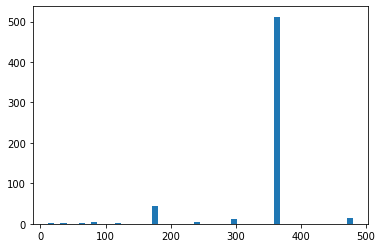

In [6]:
plt.hist(df['Loan_Amount_Term'], 50)

Line chart

Text(0.5, 1.0, 'Plot of the Loan Amount')

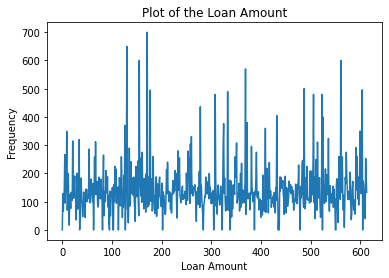

In [7]:
plt.plot(df.LoanAmount)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title("Plot of the Loan Amount")

The Loan_Amount_Term dropped.

In [8]:
df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

Missing value is replaced with 0. 

In [9]:
df = df.fillna('0')
#credit_df = credit_df.replace({'NaN':credit_df.median()})
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban,1


View how variables are distributed.

In [10]:
#Lets analysze the distribution of the various attribute
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


Viewing 'Loan_Status'column, and how it is distributed. 

In [11]:
df.groupby(["Loan_Status"]).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
0,5446.078125,1877.807292,142.557292
1,5384.068720,1504.516398,140.533175


Convert X & Y variable to a categorical variable.

In [12]:
df['Loan_Status'] = df['Loan_Status'].astype('category')
df['Credit_History'] = df['Credit_History'].astype('category')

In [13]:
prop_Y = df['Loan_Status'].value_counts(normalize=True)
print(prop_Y)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64


 X and Y variables are defined

In [14]:
X = df.drop('Loan_Status', axis=1)
Y = df[['Loan_Status']]

 Converting the categorical variables to numeric variables

In [15]:
X = pd.get_dummies(X, drop_first=True)

Splitting into a ratio of 60:40.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

Logistic regression model 

In [17]:
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

         Current function value: 0.445488
         Iterations: 35


Results

In [18]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  307
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           17
Date:                Sat, 28 Jan 2023   Pseudo R-squ.:                  0.3065
Time:                        14:20:06   Log-Likelihood:                -136.76
converged:                      False   LL-Null:                       -197.21
Covariance Type:            nonrobust   LLR p-value:                 1.047e-17
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      15.7698    3.3e+04      0.000      1.000   -6.46e+04    6.46e+04
ApplicantIncome         -2.969e-05   3.57e-05     -0.831      0.406   -9.97e-05    4.03e-05


The odds ratio from the coefficients using the formula odds ratio=exp(coef). The probability from the odds ratio using the formula probability = odds / (1+odds).

In [19]:
log_coef = pd.DataFrame(lg.params, columns=['coef'])
log_coef.loc[:, "Odds_ratio"] = np.exp(log_coef.coef)
log_coef['probability'] = log_coef['Odds_ratio']/(1+log_coef['Odds_ratio'])
log_coef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

Filter all the independent variables by significant p-value.

In [20]:
log_coef = log_coef.sort_values(by="Odds_ratio",ascending=False)
pval_filter = log_coef['pval']<=0.1
log_coef[pval_filter]

,coef,Odds_ratio,probability,pval
Credit_History_1.0,4.28,72.55,0.99,0.00
Credit_History_0,4.19,66.16,0.99,0.00
Property_Area_Semiurban,0.83,2.29,0.70,0.03
Education_Not Graduate,-0.68,0.51,0.34,0.06
Dependents_1,-0.96,0.38,0.28,0.02


In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Checking the accuracy of the model on the training data using confusion matrix

In [22]:
pred_train = log_reg.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[ 52  53]
 [ 22 180]]


Prediction for test set.

confusion matrix = 
 [[ 38  49]
 [ 23 197]]


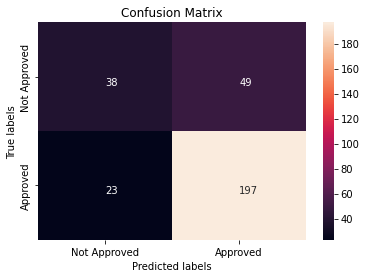

In [23]:
pred_test = log_reg.predict(X_test)
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)
ax= plt.subplot()
ax.set_ylim(2.0, 0)
annot_kws = {"ha": 'left',"va": 'top'}

sns.heatmap(mat_test, annot=True, ax = ax, fmt= 'g',
annot_kws=annot_kws); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Approved', 'Approved']);
ax.yaxis.set_ticklabels(['Not Approved', 'Approved']);

Getting the AUC ROC curve and get the AUC score.

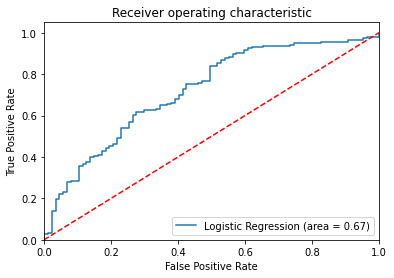

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [25]:
auc_score = metrics.roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.72

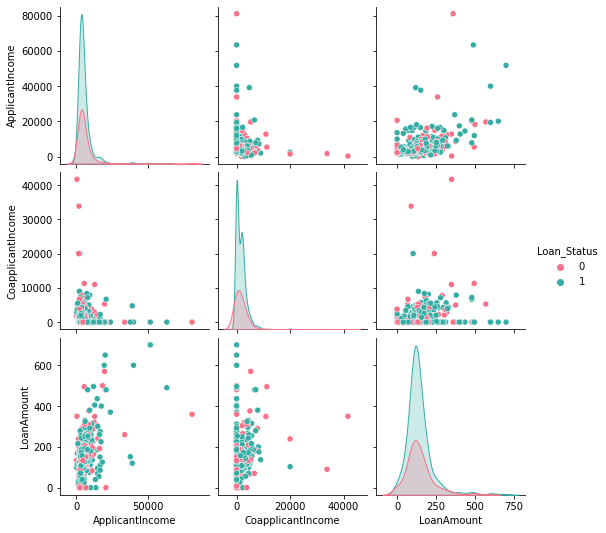

In [26]:
import seaborn as sns
sns.pairplot(df, hue="Loan_Status", palette="husl")

Logistic Regression

In [27]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.765


Support-vector machines (SVM) are another type of linear classifier. SVM attempts to construct a hyperplane (like a straight, 1D line in a 2D space), such that it separates the objects into classes, similarly to logistic regression. SVM, however, is concerned with finding the line that has the greatest distance to the nearest training data point.

In [28]:
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.414


In [29]:
knn = KNeighborsClassifier(n_neighbors=7)

# Then fit the model
knn.fit(X_train, y_train)

# How well did it do?
knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.655


In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

# Then fit the model
knn.fit(X_train, y_train)

# How well did it do?
knn_5_score = knn.score(X_test, y_test)
knn_5_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 5): {:.3f}'.format(knn_5_score))

Accuracy of KNN (k = 5): 0.606


In [31]:
knn = KNeighborsClassifier(n_neighbors=3)

# Then fit the model
knn.fit(X_train, y_train)

# How well did it do?
knn_5_score = knn.score(X_test, y_test)
knn_5_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 3): {:.3f}'.format(knn_5_score))

Accuracy of KNN (k = 3): 0.648


In [32]:
knn = KNeighborsClassifier(n_neighbors=9)

# Then fit the model
knn.fit(X_train, y_train)

# How well did it do?
knn_5_score = knn.score(X_test, y_test)
knn_5_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 9): {:.3f}'.format(knn_5_score))

Accuracy of KNN (k = 9): 0.678


In [33]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

dt_score = dt.score(X_test, y_test)
dt_predictions = dt.predict(X_test)
print('Accuracy of Decision Tree: {:.3f} '.format(dt_score))

Accuracy of Decision Tree: 0.664 


In [34]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=10, n_jobs=-1)


print(f'{cross_val_score(rfc, X, Y, cv=10)}\n')

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

[0.77419355 0.69354839 0.70967742 0.70967742 0.78688525 0.72131148
 0.80327869 0.70491803 0.73770492 0.78688525]

Cross-validation time elapsed: 3.23 seconds.


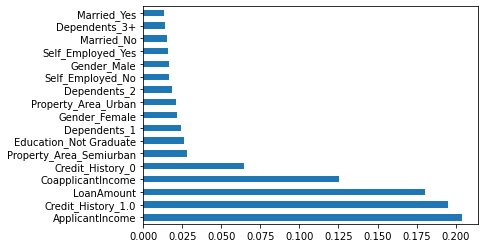

In [35]:
import matplotlib.pyplot as plt

rfc.fit(X, Y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [36]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))


Accuracy of Random Forest: 0.772


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 169 to 398
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          307 non-null    int64  
 1   CoapplicantIncome        307 non-null    float64
 2   LoanAmount               307 non-null    int64  
 3   Gender_Female            307 non-null    uint8  
 4   Gender_Male              307 non-null    uint8  
 5   Married_No               307 non-null    uint8  
 6   Married_Yes              307 non-null    uint8  
 7   Dependents_1             307 non-null    uint8  
 8   Dependents_2             307 non-null    uint8  
 9   Dependents_3+            307 non-null    uint8  
 10  Education_Not Graduate   307 non-null    uint8  
 11  Self_Employed_No         307 non-null    uint8  
 12  Self_Employed_Yes        307 non-null    uint8  
 13  Credit_History_1.0       307 non-null    uint8  
 14  Credit_History_0        

In [38]:
predictions_dictionary = {'Logistic Regression' : lr_predictions, 'KNN_7' : knn_7_predictions, 
                          'KNN_5': knn_5_predictions, 'SVM' : svm_predictions, 'Decision Tree' : dt_predictions, 
                          'Random Forest' : rf_predictions, 'Actual': y_test}

predictions_df = (predictions_dictionary)
predictions_df

{'Logistic Regression': array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
X_train, X_test

(<17x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 18 stored elements in Compressed Sparse Row format>,
 <17x18 sparse matrix of type '<class 'numpy.float64'>'
 	with 18 stored elements in Compressed Sparse Row format>)

In [67]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor 
decision_regressor = DecisionTreeRegressor()

